# TODO:
Apresentação da proposta de análise de MTG.

## Importando os dados

Para manter esse ambiente mais limpo, e agilizar alguns códigos repetitivos, algumas funções foram definidas no módulo `datasets`, cujo código pode ser encontrado neste projeto.

Caso se interesse em executar esse projeto, siga as instruções contidas no [README](README.md) do projeto.

Utilizaremos a base de dados de cartas de Magic The Gathering, disponibilizada através da API do site [Scryfall](https://scryfall.com/). A base pode ser encontrada no link: [Scryfall Default Cards Dataset](https://data.scryfall.io/default-cards/default-cards-20240216220537.json)

In [27]:
import pandas as pd
import datasets.get_dataset as gd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = gd.get_file_path()

mtg_dataset = pd.read_json(file_path)

print(mtg_dataset.shape)
(mtg_dataset.head())

(92217, 85)


,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,released_at,uri,scryfall_uri,layout,highres_image,image_status,image_uris,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,...,collector_number,digital,rarity,flavor_text,card_back_id,artist,artist_ids,illustration_id,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,related_uris,purchase_uris,all_parts,promo_types,arena_id,security_stamp,card_faces,preview,produced_mana,watermark,frame_effects,loyalty,printed_name,tcgplayer_etched_id,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,2006-10-06,https://api.scryfall.com/cards/0000579f-7b35-4...,https://scryfall.com/card/tsp/157/fury-sliver?...,normal,True,highres_scan,{'small': 'https://cards.scryfall.io/small/fro...,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,3,3,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,c1d109bc-ffd8-428f-8d7d-3f8d7e648046,tsp,Time Spiral,expansion,...,157,False,uncommon,"""A rift opened, and our arrows were abruptly s...",0aeebaf5-8c7d-4636-9e82-8c27447861f7,Paolo Parente,[d48dd097-720d-476a-8722-6a02854ae28b],2fcca987-364c-4738-a75b-099d8a26d614,black,2003,False,False,True,False,6911.0,11847.0,"{'usd': '0.35', 'usd_foil': '1.93', 'usd_etche...",{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://tcgplayer.pxf.io/c/4931...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,2009-10-02,https://api.scryfall.com/cards/00006596-1166-4...,https://scryfall.com/card/zen/21/kor-outfitter...,normal,True,highres_scan,{'small': 'https://cards.scryfall.io/small/fro...,{W}{W},2.0,Creature — Kor Soldier,"When Kor Outfitter enters the battlefield, you...",2,2,[W],[W],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,eb16a2bd-a218-4e4e-8339-4aa1afc0c8d2,zen,Zendikar,expansion,...,21,False,common,"""We take only what we need to survive. Believe...",0aeebaf5-8c7d-4636-9e82-8c27447861f7,Kieran Yanner,[aa7e89ed-d294-4633-9057-ce04dacfcfa4],de0310d1-e97f-46e0-bc16-c980c2adedee,black,2003,False,False,True,False,16425.0,5450.0,"{'usd': '0.18', 'usd_foil': '5.89', 'usd_etche...",{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://tcgplayer.pxf.io/c/4931...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,2015-05-22,https://api.scryfall.com/cards/0000a54c-a511-4...,https://scryfall.com/card/tmm2/5/spirit?utm_so...,token,True,highres_scan,{'small': 'https://cards.scryfall.io/small/fro...,,0.0,Token Creature — Spirit,Flying,1,1,[W],[W],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,f7aa47c6-c1e2-4de5-9a68-4406d84bd6bb,tmm2,Modern Masters 2015 Tokens,token,...,5,False,common,NaN,0aeebaf5-8c7d-4636-9e82-8c27447861f7,Mike Sass,[155bc2cb-038d-4b1f-9990-6178db1d1a21],1dbe0618-dd47-442c-acf6-ac5e4b136e5a,black,2015,False,False,True,False,NaN,NaN,"{'usd': '0.14', 'usd_foil': None, 'usd_etched'...",{'tcgplayer_infinite_articles': 'https://tcgpl...,{'tcgplayer': 'https://tcgplayer.pxf.io/c/4931...,"[{'object': 'related_card', 'id': '4d8542f6-ee...",[setpromo],NaN,NaN,NaN,NaN,NaN,N

In [4]:
mtg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object               92217 non-null  object        
 1   id                   92217 non-null  object        
 2   oracle_id            92174 non-null  object        
 3   multiverse_ids       92217 non-null  object        
 4   mtgo_id              45944 non-null  float64       
 5   mtgo_foil_id         24632 non-null  float64       
 6   tcgplayer_id         79110 non-null  float64       
 7   cardmarket_id        68881 non-null  float64       
 8   name                 92217 non-null  object        
 9   lang                 92217 non-null  object        
 10  released_at          92217 non-null  datetime64[ns]
 11  uri                  92217 non-null  object        
 12  scryfall_uri         92217 non-null  object        
 13  layout               92217 non-null 

In [12]:
mtg_dataset[['name', 'mana_cost', 'power', 'toughness', 'color_identity']].iloc[0]

name              Fury Sliver
mana_cost              {5}{R}
power                       3
toughness                   3
color_identity            [R]
Name: 0, dtype: object

# Lidando com dados tratados.
É possível ver que são diversos valores no dataset bruto.
Usando algumas das funções que já aplicam tratamentos, temos:

In [17]:
mtg = gd.get_flattened_subset(concat_char="")

(mtg.head())

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN


In [18]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            92217 non-null  object 
 1   mana_cost       89327 non-null  object 
 2   cmc             92174 non-null  float64
 3   colors          89327 non-null  object 
 4   color_identity  92217 non-null  object 
 5   keywords        92217 non-null  object 
 6   power           43296 non-null  object 
 7   toughness       43296 non-null  object 
 8   type_line       92174 non-null  object 
 9   edhrec_rank     80961 non-null  float64
 10  produced_mana   13874 non-null  object 
 11  loyalty         1347 non-null   object 
 12  life_modifier   119 non-null    float64
 13  hand_modifier   119 non-null    float64
dtypes: float64(4), object(10)
memory usage: 10.6+ MB


In [19]:
mtg.value_counts('color_identity')

color_identity
G        13264
W        12923
B        12921
R        12644
U        12477
         12440
GW        1413
BU        1398
UW        1390
BR        1334
GR        1317
RW        1219
GU        1212
BW        1189
RU        1172
BG        1155
BRU        371
BGRUW      355
GRW        298
BUW        276
GUW        261
BGR        253
BGU        182
BRW        182
RUW        181
BGW        167
GRU        161
GRUW        21
BGUW        21
BGRU         7
BRUW         7
BGRW         6
Name: count, dtype: int64

## Começando com algumas perguntas simples de serem respondidas

__1__ - Quais as cores mais comuns no jogo?
Na representação de cores no magic, é comum se referir a cada cor por apenas uma letra. Sendo assim, temos:
- __B__: Black (_Preto_)
- __G__: Green (_Verde_)
- __R__: Red (_Vermelho_)
- __W__: White (_Branco_)
- __U__: Blue (_Azul_)

In [40]:
mtg_colors = mtg.groupby('color_identity').size().reset_index(name='count')

total_count = mtg_colors['count'].sum()
mtg_colors['percentage'] = (mtg_colors['count'] / total_count) * 100

(mtg_colors.sort_values('count', ascending=False))

,color_identity,count,percentage
17,G,13264,14.383465
31,W,12923,14.013685
1,B,12921,14.011516
25,R,12644,13.711138
29,U,12477,13.530043
0,,12440,13.489921
24,GW,1413,1.532255
14,BU,1398,1.515989
30,UW,1390,1.507314
10,BR,1334,1.446588


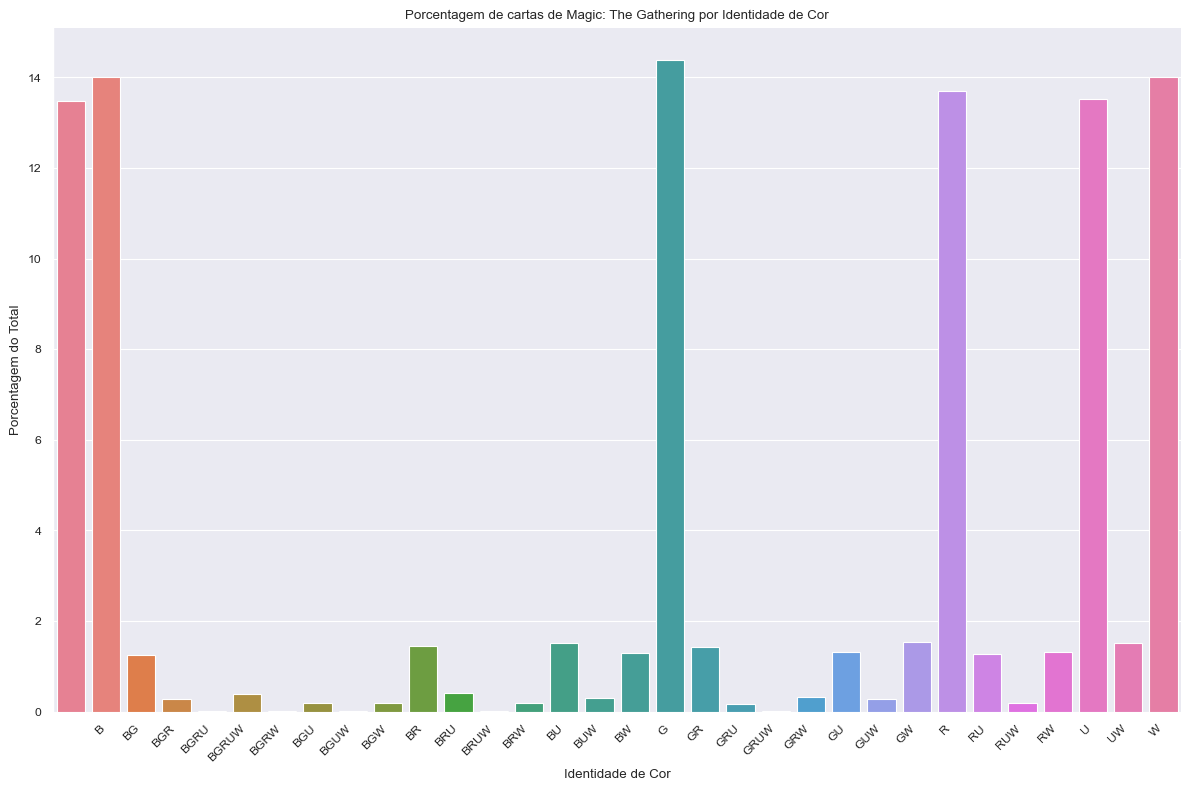

In [38]:
# Quais as cores de cartas mais comuns no jogo?
plt.figure(figsize= (12, 8))

sns.set_theme(style='darkgrid', context='paper')

bars = sns.barplot(
  data=mtg_colors,
  x='color_identity',
  y='percentage',
  hue='color_identity',
  legend=False,
)

sns.despine(bottom=True)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Identidade de Cor')
plt.ylabel("Porcentagem do Total")
plt.title("Porcentagem de cartas de Magic: The Gathering por Identidade de Cor")
plt.tight_layout()

plt.show()